# Making Vector_map using streamplot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)
print(U.shape)
fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

(100, 100)


<Figure size 504x648 with 0 Axes>

Text(0.5, 1.0, 'Varying Density')

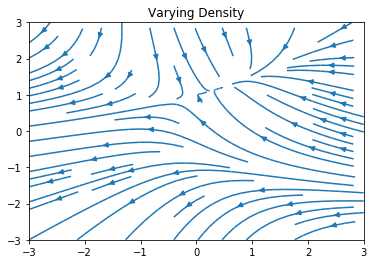

In [4]:
#  Varying density along a streamline
fig0, ax0 = plt.subplots()
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

Text(0.5, 1.0, 'Varying Color')

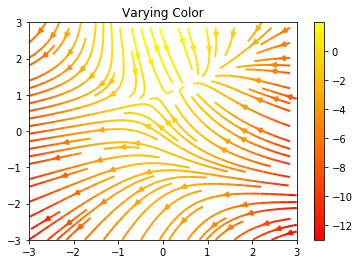

In [5]:
# Varying color along a streamline
fig1, ax1 = plt.subplots()
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig1.colorbar(strm.lines)
ax1.set_title('Varying Color')

[[5.         4.90812897 4.81850516 ... 3.90851739 3.99763144 4.08951561]
 [4.91863362 4.8259931  4.73560106 ... 3.85250099 3.94289101 4.0360216 ]
 [4.839619   4.74622069 4.65507122 ... 3.79941738 3.89104074 3.98537352]
 ...
 [3.67356194 3.59959531 3.5284843  ... 2.28387517 2.36022744 2.44056292]
 [3.749282   3.67684937 3.60726161 ... 2.3298461  2.40320649 2.48065096]
 [3.82820747 3.75729667 3.68921625 ... 2.38093106 2.45124566 2.52572967]]


Text(0.5, 1.0, 'Varying Line Width')

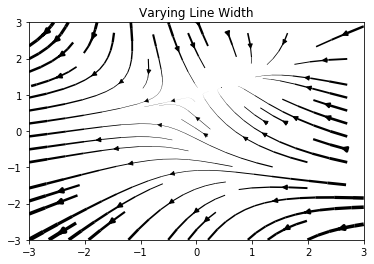

In [7]:
#  Varying line width along a streamline
fig2, ax2 = plt.subplots()
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

[(-3, 3), (-3, 3)]

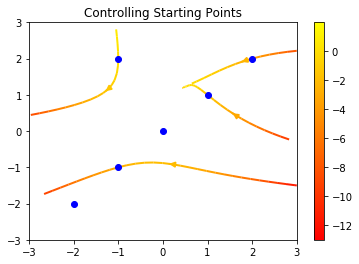

In [27]:
# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

fig3, ax3 = plt.subplots()
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig3.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

In [28]:
# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

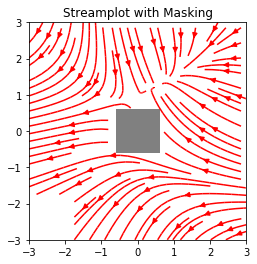

In [29]:
fig4, ax4 = plt.subplots()
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')